<a href="https://colab.research.google.com/github/juliosdutra/ModelagemPPEQ1019/blob/main/FTIR_simulado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## **Passo a Passo para Simular a Base de Dados**

### 1. **Entendendo as Fibras Naturais**
   - **Fibras Vegetais**: Exemplos incluem fibras de coco, sisal, juta, curauá, bambu, etc.
   - **Composição Química**: As fibras vegetais são compostas principalmente de celulose, hemicelulose, lignina e pectina.
   - **Propriedades Termomecânicas**: Incluem resistência à tração, módulo de elasticidade, condutividade térmica, entre outras.

---

### 2. **Simulação dos Espectros FTIR**
   - **Picos Característicos**:
     - **Celulose**: Picos em ~3300 cm⁻¹ (O-H), ~2900 cm⁻¹ (C-H), ~1050 cm⁻¹ (C-O).
     - **Hemicelulose**: Picos em ~1730 cm⁻¹ (C=O), ~1240 cm⁻¹ (C-O).
     - **Lignina**: Picos em ~1600 cm⁻¹ (C=C aromático), ~1500 cm⁻¹ (C-H).
   - **Variação**: A intensidade e posição dos picos podem variar dependendo da composição da fibra.

---

### 3. **Simulação das Propriedades Termomecânicas**
   - **Resistência à Tração**: Pode variar de 50 a 1000 MPa, dependendo da fibra.
   - **Módulo de Elasticidade**: Pode variar de 1 a 50 GPa.
   - **Condutividade Térmica**: Pode variar de 0,1 a 0,5 W/m·K.

---

### 4. **Exemplo de Código em Python**

Aqui está um exemplo de como simular uma base de dados de FTIR e propriedades termomecânicas:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configurações
num_amostras = 100  # Número de amostras
num_pontos = 1000   # Número de pontos no eixo x (número de onda)
wave_numbers = np.linspace(400, 4000, num_pontos)  # Faixa de números de onda (400-4000 cm⁻¹)

# Função para criar um pico Gaussiano
def gaussian_peak(x, center, height, width):
    return height * np.exp(-((x - center) ** 2) / (2 * width ** 2))

# Gerar espectros sintéticos
spectra = np.zeros((num_amostras, num_pontos))

# Picos característicos das fibras vegetais
picos_celulose = [(3300, 0.8, 50), (2900, 0.6, 30), (1050, 0.7, 40)]
picos_hemicelulose = [(1730, 0.5, 20), (1240, 0.4, 25)]
picos_lignina = [(1600, 0.6, 35), (1500, 0.5, 30)]

for i in range(num_amostras):
    # Adicionar picos de celulose
    for center, height, width in picos_celulose:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)
    
    # Adicionar picos de hemicelulose
    for center, height, width in picos_hemicelulose:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)
    
    # Adicionar picos de lignina
    for center, height, width in picos_lignina:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)
    
    # Adicionar ruído
    noise = np.random.normal(0, 0.02, num_pontos)  # Ruído aleatório
    spectra[i] += noise

# Gerar propriedades termomecânicas sintéticas
resistencia_tracao = np.random.uniform(50, 1000, num_amostras)  # Resistência à tração (MPa)
modulo_elasticidade = np.random.uniform(1, 50, num_amostras)    # Módulo de elasticidade (GPa)
condutividade_termica = np.random.uniform(0.1, 0.5, num_amostras)  # Condutividade térmica (W/m·K)

# Plotar alguns espectros
plt.figure(figsize=(10, 6))
for i in range(5):  # Plotar as primeiras 5 amostras
    plt.plot(wave_numbers, spectra[i], label=f"Amostra {i+1}")
plt.title("Espectros FTIR Simulados de Fibras Vegetais")
plt.xlabel("Número de Onda (cm⁻¹)")
plt.ylabel("Absorbância")
plt.legend()
plt.grid()
plt.show()

# Criar DataFrame
df = pd.DataFrame(spectra, columns=[f"wave_{int(w)}" for w in wave_numbers])
df["resistencia_tracao"] = resistencia_tracao
df["modulo_elasticidade"] = modulo_elasticidade
df["condutividade_termica"] = condutividade_termica

# Salvar em CSV
df.to_csv("ftir_fibras_naturais.csv", index=False)
print("Dados simulados salvos em 'ftir_fibras_naturais.csv'.")
```

---

### 5. **Explicação do Código**
   - **Espectros FTIR**: Foram simulados picos característicos de celulose, hemicelulose e lignina.
   - **Propriedades Termomecânicas**: Foram geradas aleatoriamente dentro de faixas típicas para fibras vegetais.
   - **Ruído**: Adicionado para simular variações experimentais.
   - **Salvamento**: Os dados foram salvos em um arquivo CSV para uso futuro.

---

### 6. **Próximos Passos**
   Com os dados simulados, você pode:
   - **Pré-processar os espectros**: Aplicar técnicas como SNV, derivadas, ou correção de linha de base.
   - **Treinar modelos**: Usar PLSR, Random Forest, ou redes neurais para prever as propriedades termomecânicas.
   - **Avaliar o modelo**: Calcular métricas como R² e RMSE.

---

### 7. **Limitações dos Dados Simulados**
   - **Falta de Realismo**: Dados simulados não capturam completamente a complexidade de espectros reais.
   - **Aplicação Limitada**: São úteis para testes, mas modelos treinados com dados simulados podem não generalizar bem para dados reais.

---

### 8. **Alternativa: Dados Reais**
Se você preferir trabalhar com dados reais, aqui estão algumas sugestões:
   - **Publicações Científicas**: Procure artigos que tenham estudado fibras vegetais brasileiras e verifique se os dados estão disponíveis.
   - **Instituições de Pesquisa**: Entre em contato com universidades ou institutos de pesquisa que trabalham com fibras naturais.
   - **Bases de Dados Públicas**: Verifique se há dados disponíveis em plataformas como o [NIST Chemistry WebBook](https://webbook.nist.gov/chemistry/) ou [SDBS](https://sdbs.db.aist.go.jp/).

---

Se precisar de mais ajuda ou quiser explorar outras técnicas, é só avisar! 😊

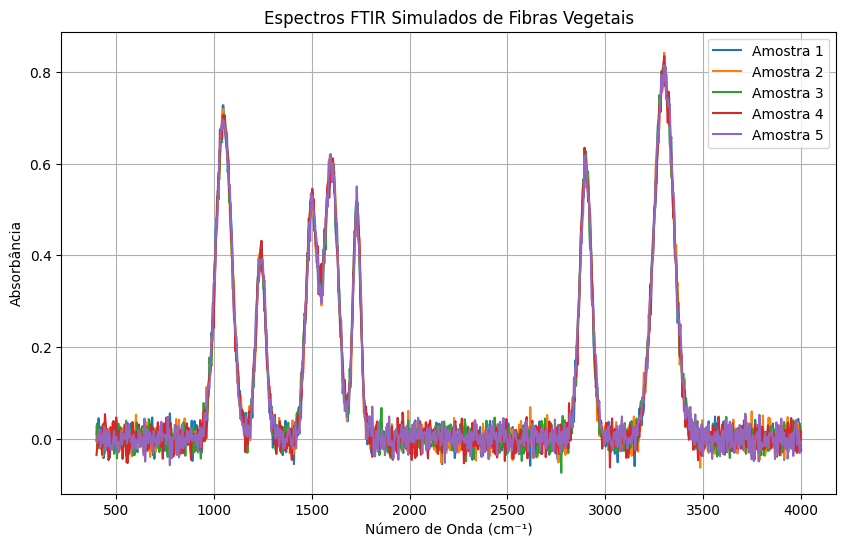

Dados simulados salvos em 'ftir_fibras_naturais.csv'.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configurações
num_amostras = 100  # Número de amostras
num_pontos = 1000   # Número de pontos no eixo x (número de onda)
wave_numbers = np.linspace(400, 4000, num_pontos)  # Faixa de números de onda (400-4000 cm⁻¹)

# Função para criar um pico Gaussiano
def gaussian_peak(x, center, height, width):
    return height * np.exp(-((x - center) ** 2) / (2 * width ** 2))

# Gerar espectros sintéticos
spectra = np.zeros((num_amostras, num_pontos))

# Picos característicos das fibras vegetais
picos_celulose = [(3300, 0.8, 50), (2900, 0.6, 30), (1050, 0.7, 40)]
picos_hemicelulose = [(1730, 0.5, 20), (1240, 0.4, 25)]
picos_lignina = [(1600, 0.6, 35), (1500, 0.5, 30)]

for i in range(num_amostras):
    # Adicionar picos de celulose
    for center, height, width in picos_celulose:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)

    # Adicionar picos de hemicelulose
    for center, height, width in picos_hemicelulose:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)

    # Adicionar picos de lignina
    for center, height, width in picos_lignina:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)

    # Adicionar ruído
    noise = np.random.normal(0, 0.02, num_pontos)  # Ruído aleatório
    spectra[i] += noise

# Gerar propriedades termomecânicas sintéticas
resistencia_tracao = np.random.uniform(50, 1000, num_amostras)  # Resistência à tração (MPa)
modulo_elasticidade = np.random.uniform(1, 50, num_amostras)    # Módulo de elasticidade (GPa)
condutividade_termica = np.random.uniform(0.1, 0.5, num_amostras)  # Condutividade térmica (W/m·K)

# Plotar alguns espectros
plt.figure(figsize=(10, 6))
for i in range(5):  # Plotar as primeiras 5 amostras
    plt.plot(wave_numbers, spectra[i], label=f"Amostra {i+1}")
plt.title("Espectros FTIR Simulados de Fibras Vegetais")
plt.xlabel("Número de Onda (cm⁻¹)")
plt.ylabel("Absorbância")
plt.legend()
plt.grid()
plt.show()

# Criar DataFrame
df = pd.DataFrame(spectra, columns=[f"wave_{int(w)}" for w in wave_numbers])
df["resistencia_tracao"] = resistencia_tracao
df["modulo_elasticidade"] = modulo_elasticidade
df["condutividade_termica"] = condutividade_termica

# Salvar em CSV
df.to_csv("ftir_fibras_naturais.csv", index=False)
print("Dados simulados salvos em 'ftir_fibras_naturais.csv'.")

In [ ]:
df

,wave_400,wave_403,wave_407,wave_410,wave_414,wave_418,wave_421,wave_425,wave_428,wave_432,...,wave_3978,wave_3981,wave_3985,wave_3989,wave_3992,wave_3996,wave_4000,resistencia_tracao,modulo_elasticidade,condutividade_termica
0,-0.003772,0.016781,0.007420,0.044709,-0.005556,0.025014,0.023257,0.024813,0.002776,0.017219,...,0.015673,0.000063,0.043341,0.018092,0.033258,-0.008325,0.011599,994.083901,45.085755,0.183909
1,0.027931,-0.023548,-0.004072,0.014701,-0.021021,-0.016961,0.006263,-0.009550,0.020021,-0.038295,...,-0.031475,0.035285,0.010643,0.025468,-0.004857,0.008516,-0.013004,385.207815,39.382017,0.305489
2,0.009693,0.032824,-0.019499,0.007498,0.021482,0.001016,-0.021159,0.001022,-0.020789,0.031689,...,-0.005115,-0.016532,0.008112,-0.027203,0.016338,0.027411,-0.014116,712.306346,31.832942,0.404988
3,-0.035317,-0.019910,0.004971,0.002473,-0.013916,0.015324,-0.003937,-0.015448,-0.034967,0.029189,...,-0.011537,-0.030021,0.005263,0.003192,-0.029775,0.018906,-0.026530,489.456160,23.544353,0.325266
4,-0.005147,-0.009183,-0.001842,0.007334,0.020322,0.000280,-0.017953,-0.002890,0.011260,-0.007861,...,0.025765,-0.013076,0.002091,0.017793,-0.031460,-0.015591,-0.006654,768.578954,32.240471,0.186297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.017992,-0.006673,0.000547,-0.016578,0.008388,-0.006074,-0.032981,-0.052856,0.000274,0.002718,...,-0.005091,-0.021811,-0.030536,0.012610,0.016277,-0.024912,0.016648,375.655720,30.686950,0.260362
96,-0.031536,-0.009879,-0.013688,-0.019896,0.022293,-0.032705,-0.032582,0.000097,-0.005865,-0.027148,...,-0.007557,0.003221,0.013424,0.013882,0.002507,-0.025251,-0.045640,309.719929,45.161685,0.482061
97,0.004484,-0.011382,-0.016231,0.016862,0.006777,-0.014744,-0.003630,0.012366,-0.002265,-0.004905,...,0.017965,-0.022017,0.009406,0.003747,-0.019778,0.009779,0.000220,363.674913,7.155370,0.227828
98,0.000108,-0.009825,-0.002292,-0.021482,0.010037,-0.026917,-0.005066,-0.010769,-0.045707,-0.000727,...,0.000641,0.000031,0.003642,0.004150,-0.020151,-0.013149,0.008964,409.632570,17.652895,0.200184


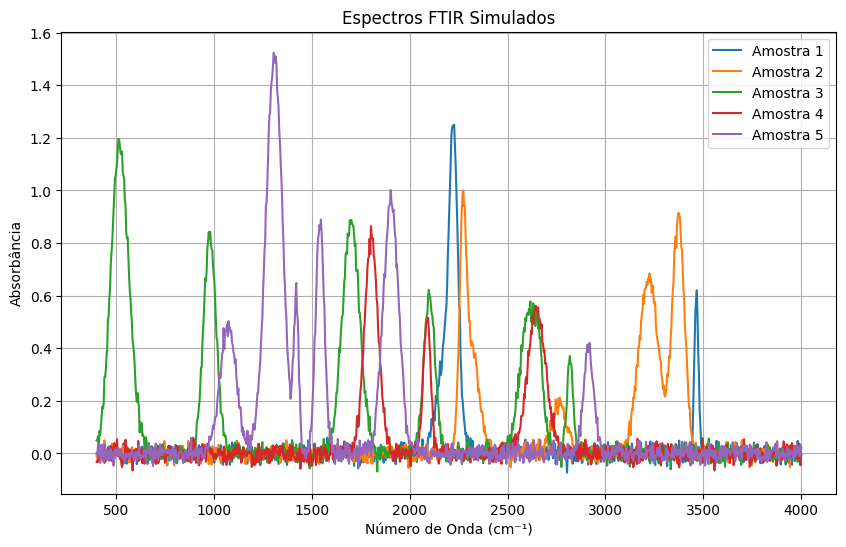

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações
num_amostras = 100  # Número de amostras
num_pontos = 1000   # Número de pontos no eixo x (número de onda)
wave_numbers = np.linspace(400, 4000, num_pontos)  # Faixa de números de onda (400-4000 cm⁻¹)

# Função para criar um pico Gaussiano
def gaussian_peak(x, center, height, width):
    return height * np.exp(-((x - center) ** 2) / (2 * width ** 2))

# Gerar espectros sintéticos
spectra = np.zeros((num_amostras, num_pontos))

for i in range(num_amostras):
    # Adicionar picos aleatórios
    num_picos = np.random.randint(3, 10)  # Número de picos por espectro
    for _ in range(num_picos):
        center = np.random.uniform(500, 3500)  # Posição do pico
        height = np.random.uniform(0.1, 1.0)   # Intensidade do pico
        width = np.random.uniform(10, 50)      # Largura do pico
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)

    # Adicionar ruído
    noise = np.random.normal(0, 0.02, num_pontos)  # Ruído aleatório
    spectra[i] += noise

# Plotar alguns espectros
plt.figure(figsize=(10, 6))
for i in range(5):  # Plotar as primeiras 5 amostras
    plt.plot(wave_numbers, spectra[i], label=f"Amostra {i+1}")
plt.title("Espectros FTIR Simulados")
plt.xlabel("Número de Onda (cm⁻¹)")
plt.ylabel("Absorbância")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Adicionar propriedades do material (exemplo: concentração de água, gordura, proteína)
concentracoes = np.random.uniform(0, 100, (num_amostras, 3))  # 3 propriedades
print("Concentrações (água, gordura, proteína):")
print(concentracoes[:5])  # Mostrar as primeiras 5 amostras

Concentrações (água, gordura, proteína):
[[71.91320241 58.38221577 35.75506209]
 [35.41975327 50.98688944 43.97744547]
 [92.51993783  4.53703451 63.04497746]
 [65.08534405 36.39785566 34.40108772]
 [62.65527244 88.22901612 73.07817777]]


In [ ]:
import pandas as pd

# Criar DataFrame
df = pd.DataFrame(spectra, columns=[f"wave_{int(w)}" for w in wave_numbers])
df["agua"] = concentracoes[:, 0]
df["gordura"] = concentracoes[:, 1]
df["proteina"] = concentracoes[:, 2]

# Salvar em CSV
df.to_csv("ftir_simulado.csv", index=False)
print("Dados simulados salvos em 'ftir_simulado.csv'.")

df

Dados simulados salvos em 'ftir_simulado.csv'.


,wave_400,wave_403,wave_407,wave_410,wave_414,wave_418,wave_421,wave_425,wave_428,wave_432,...,wave_3978,wave_3981,wave_3985,wave_3989,wave_3992,wave_3996,wave_4000,agua,gordura,proteina
0,-0.003372,-0.012257,-0.024658,-0.011713,-0.017791,-0.000917,-0.013438,-0.015128,0.009944,0.015845,...,-0.018879,0.047842,0.013313,0.025040,-0.011382,0.002886,0.019574,71.913202,58.382216,35.755062
1,-0.010006,-0.012959,-0.022026,0.026584,-0.013959,-0.032019,-0.006550,0.008216,-0.003684,0.023405,...,0.014032,0.009410,0.028308,0.002210,0.006209,0.026609,0.023280,35.419753,50.986889,43.977445
2,0.049520,0.053769,0.064784,0.021000,0.085160,0.070649,0.104223,0.136915,0.178188,0.170127,...,0.005994,-0.032101,0.025512,0.021425,0.005667,0.023002,-0.004238,92.519938,4.537035,63.044977
3,-0.032505,-0.026534,-0.031475,-0.001686,-0.009726,0.011580,-0.010865,-0.001167,0.010329,-0.026121,...,-0.020896,-0.000930,-0.017728,0.038188,-0.023469,-0.044905,-0.004342,65.085344,36.397856,34.401088
4,0.001357,-0.002862,0.033671,0.000148,0.033740,-0.035506,-0.015684,-0.008616,0.034188,0.000503,...,0.013604,0.028251,0.012189,0.003806,-0.011185,0.033833,0.000842,62.655272,88.229016,73.078178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000959,-0.012290,-0.005989,0.023640,0.009507,-0.013993,-0.007590,0.020630,0.006809,0.003170,...,0.015464,-0.021079,0.034892,-0.004281,0.003056,0.003573,-0.016087,19.559614,11.430597,66.798828
96,0.064151,-0.011279,0.009082,0.023072,-0.013487,0.003811,0.015149,0.012533,-0.007879,0.018620,...,0.006832,0.015147,-0.042022,0.006119,0.026440,-0.013755,0.022070,57.495398,58.507266,4.074690
97,0.048192,-0.000382,-0.013044,0.000443,-0.024889,-0.000877,-0.009679,-0.012851,-0.023678,-0.002339,...,0.015925,-0.004941,-0.003065,0.004999,0.018329,-0.010813,-0.022031,1.267616,12.114270,10.436459
98,-0.038588,0.022094,-0.000878,0.019950,-0.010551,0.003706,-0.000482,-0.008905,-0.016999,0.010085,...,-0.004750,-0.045747,-0.013520,0.007272,0.012273,0.005235,0.008277,18.261383,90.467158,10.111297
